In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/20200331-WHO.csv')
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case
0,China,82545,98,3314,4,Local transmission,0
1,Republic of Korea,9786,125,162,4,Local transmission,0
2,Australia,4359,393,18,2,Local transmission,0
3,Malaysia,2626,156,37,3,Local transmission,0
4,Japan,1953,87,56,2,Local transmission,0
...,...,...,...,...,...,...,...
197,Angola,2,0,0,0,Imported cases only,9
198,Guinea-Bissau,2,0,0,0,Imported cases only,5
199,Réunion,207,0,0,0,Local transmission,1
200,Mayotte,82,0,0,0,Local transmission,1


In [2]:
df = df[df['Country/Territory'] != 'conveyance (Diamond']

In [3]:
death_rate = df['Total Deaths']/df['Total Confirmed']*100
df['Death Rate'] = death_rate
df

c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
0,China,82545,98,3314,4,Local transmission,0,4.014780
1,Republic of Korea,9786,125,162,4,Local transmission,0,1.655426
2,Australia,4359,393,18,2,Local transmission,0,0.412939
3,Malaysia,2626,156,37,3,Local transmission,0,1.408987
4,Japan,1953,87,56,2,Local transmission,0,2.867384
...,...,...,...,...,...,...,...,...
196,Liberia,3,0,0,0,Local transmission,9,0.000000
197,Angola,2,0,0,0,Imported cases only,9,0.000000
198,Guinea-Bissau,2,0,0,0,Imported cases only,5,0.000000
199,Réunion,207,0,0,0,Local transmission,1,0.000000


In [4]:
countries_infected = len(df)
print('The total number of countries infected is:',countries_infected)

The total number of countries infected is: 201


In [5]:
df = df.sort_values(by=['Death Rate'],ascending=False)

df[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
195,Gambia,3,0,1,0,Imported cases only,2,33.333333
107,Sudan,6,0,2,0,Imported cases only,1,33.333333
141,Nicaragua,4,0,1,0,Imported cases only,2,25.000000
194,Zimbabwe,5,0,1,0,Local transmission,3,20.000000
191,Cabo Verde,5,0,1,0,Imported cases only,3,20.000000
105,Syrian Arab Republic,10,1,2,1,Imported cases only,0,20.000000
178,Niger,20,0,3,0,Local transmission,1,15.000000
187,Gabon,7,0,1,0,Imported cases only,3,14.285714
138,Guyana,8,3,1,0,Local transmission,0,12.500000
19,Italy,101739,4050,11591,810,Local transmission,0,11.392878


In [6]:
minimum_number_cases = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfMinNumCases = df[df['Total Confirmed'] > minimum_number_cases]
dfMinNumCases = dfMinNumCases.reset_index(drop=True)
dfMinNumCases.index = np.arange(1, (len(dfMinNumCases)+1))

dfMinNumCases[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
1,Italy,101739,4050,11591,810,Local transmission,0,11.392878
2,Indonesia,1414,129,122,8,Local transmission,0,8.628006
3,Spain,85195,6398,7340,812,Local transmission,0,8.615529
4,Netherlands,11750,884,864,93,Local transmission,0,7.353191
5,France,43977,4335,3017,415,Local transmission,0,6.860404
6,Iran,41495,3186,2757,117,Local transmission,0,6.644174
7,The United Kingdom,22145,2619,1408,180,Local transmission,0,6.358094
8,Philippines,1546,128,78,7,Local transmission,0,5.045278
9,Belgium,11899,1063,513,82,Local transmission,0,4.311287
10,China,82545,98,3314,4,Local transmission,0,4.014780


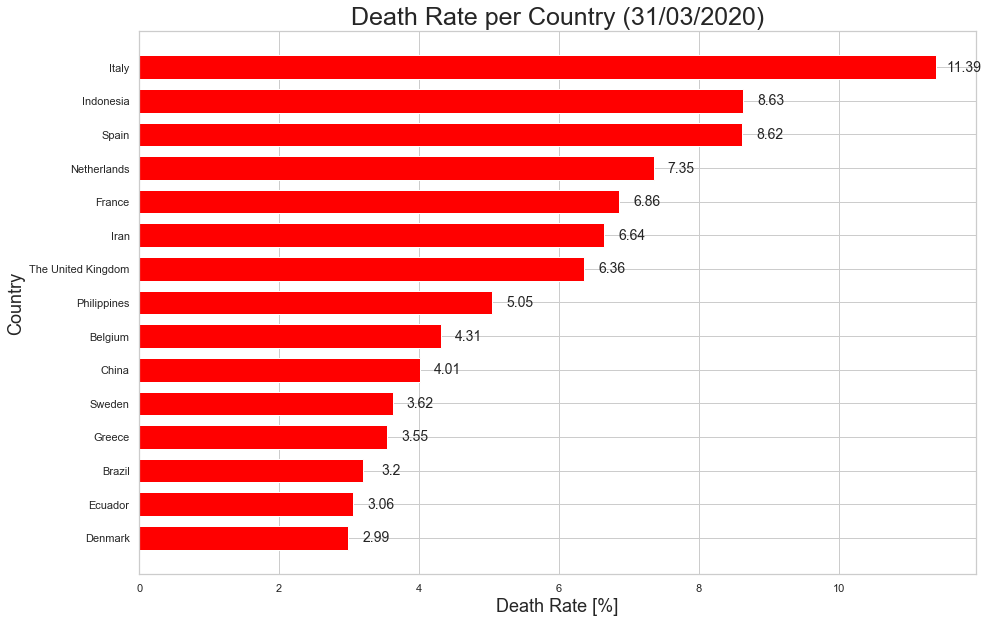

In [7]:
#matplotlib defaults
sns.set(style="whitegrid")
top15_deathrate = dfMinNumCases[0:15]
death_rate = top15_deathrate.round({'Death Rate':2})
death_rate = death_rate['Death Rate']


plt.figure(figsize=(15,10))
plt.barh(top15_deathrate['Country/Territory'],top15_deathrate['Death Rate'],height=0.7, color='red')
plt.title('Death Rate per Country (31/03/2020)',fontsize=25)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

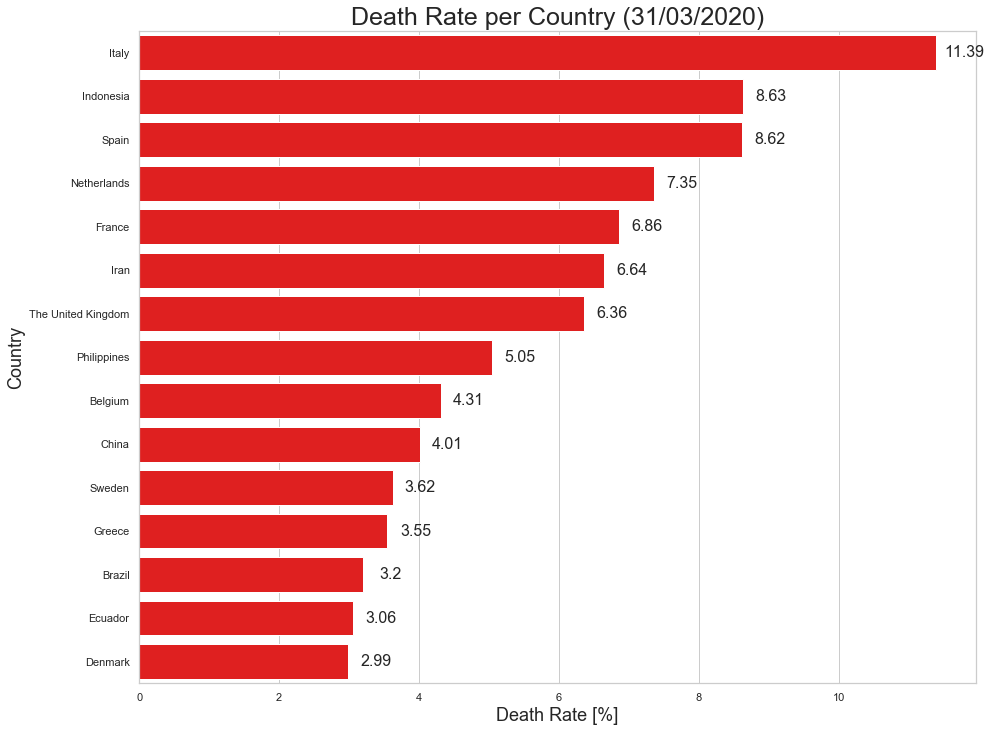

In [8]:
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Death Rate',y='Country/Territory', data=top15_deathrate ,
            label="Deaths", color="red")
plt.title('Death Rate per Country (31/03/2020)',fontsize=25)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200331_DeathRatePerCountry.png', bbox_inches='tight')
plt.show()


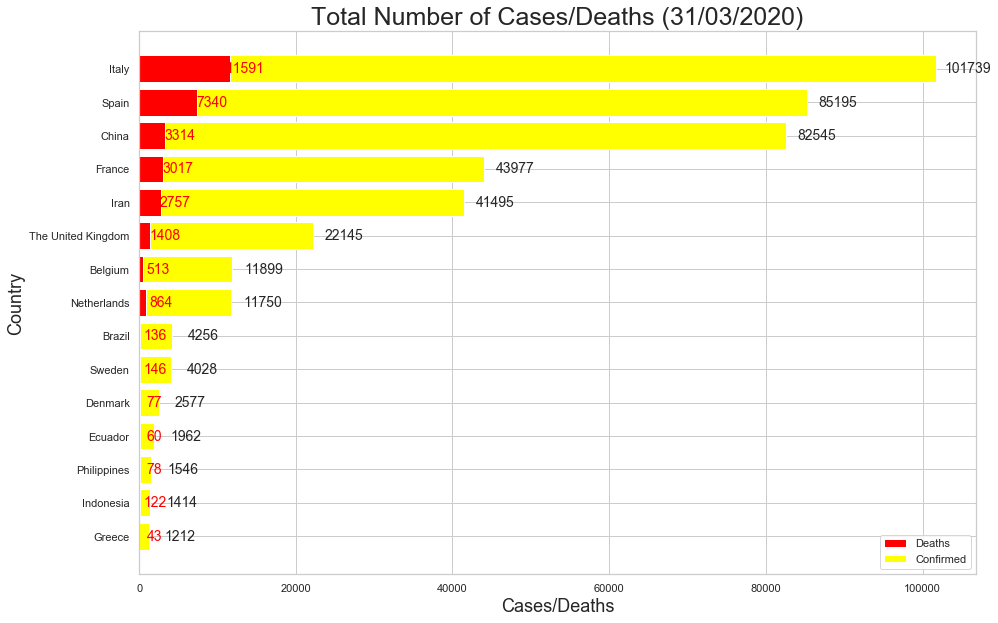

In [9]:
#matplotlib defaults
top15_confirmed = top15_deathrate.sort_values(by=['Total Confirmed'],ascending=False)
countries = np.array(top15_confirmed['Country/Territory'])
confirmed = np.array(top15_confirmed['Total Confirmed'])
deaths = np.array(top15_confirmed['Total Deaths'])
diference = confirmed - deaths

plt.figure(figsize=(15,10))
p1 = plt.barh(countries,deaths, color='red')
p2 = plt.barh(countries,diference,left=deaths, color='yellow')
plt.title('Total Number of Cases/Deaths (31/03/2020)',fontsize=25)
plt.xlabel('Cases/Deaths',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.legend((p1[0], p2[0]), ('Deaths', 'Confirmed'), loc='lower right')
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

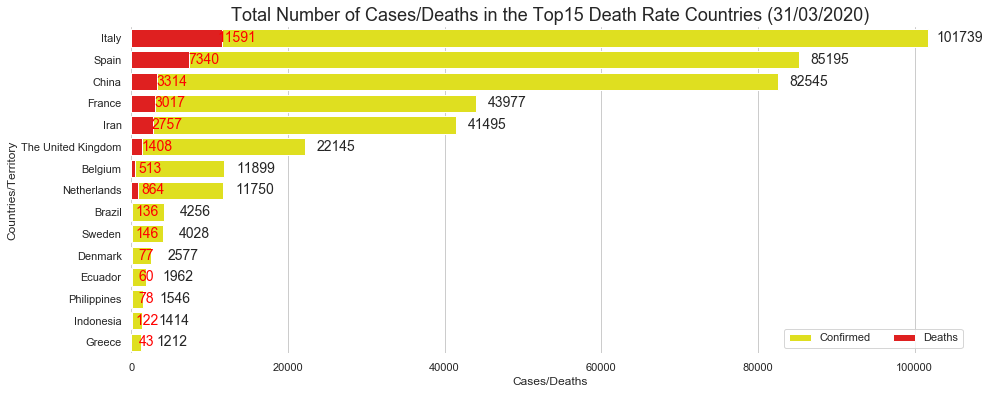

In [10]:
#seaborn defaults
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15_confirmed,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15_confirmed ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Death Rate Countries (31/03/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200331_TotalNumberCasesDeaths.png', bbox_inches='tight')

In [11]:
dfDSLRC = df.sort_values(by=['Days since last reported case'],ascending=False)#dfDSLRC = dataframe Days since last reported case
dfDSLRC[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
144,Saint Vincent and the Grenadines,1,0,0,0,Imported cases only,18,0.000000
14,Papua New Guinea,1,0,0,0,Imported cases only,10,0.000000
88,Timor-Leste,1,0,0,0,Under investigation,10,0.000000
196,Liberia,3,0,0,0,Local transmission,9,0.000000
197,Angola,2,0,0,0,Imported cases only,9,0.000000
198,Guinea-Bissau,2,0,0,0,Imported cases only,5,0.000000
13,Fiji,5,0,0,0,Local transmission,5,0.000000
190,Eritrea,6,0,0,0,Imported cases only,4,0.000000
192,Chad,5,0,0,0,Imported cases only,4,0.000000
108,Somalia,3,0,0,0,Imported cases only,4,0.000000


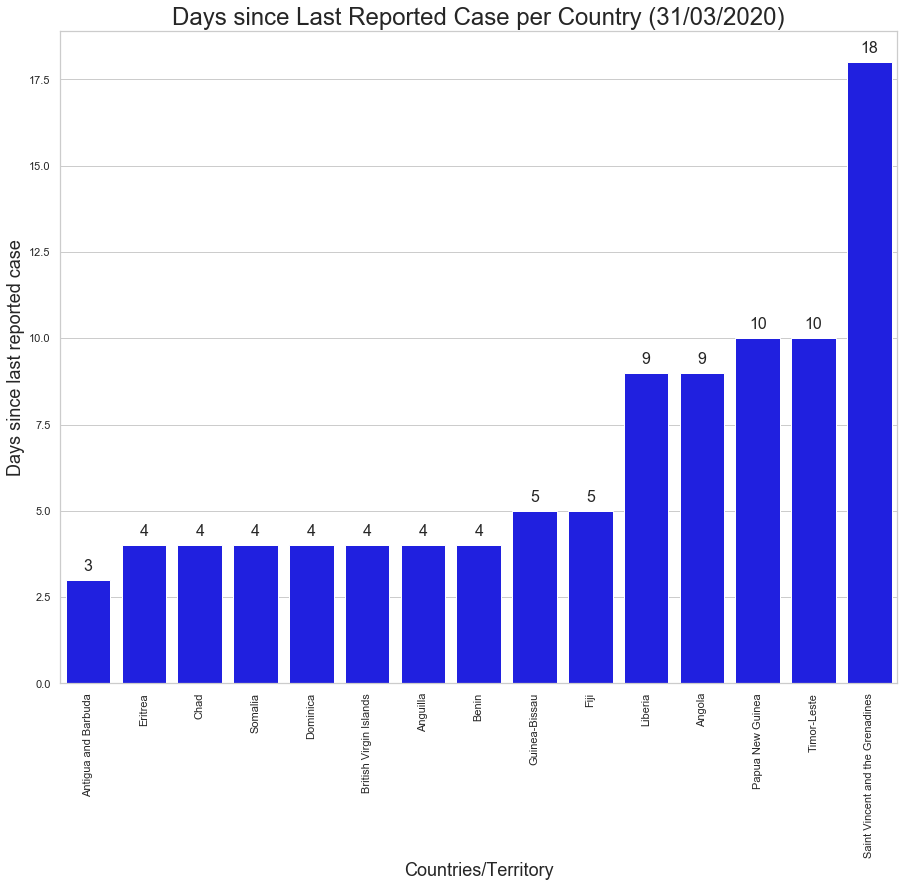

In [12]:
#seaborn defaults
top15DSLRC = dfDSLRC[0:15].sort_values(by=['Days since last reported case'])
DSLRC = top15DSLRC['Days since last reported case']

f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Country/Territory',y='Days since last reported case', data=top15DSLRC ,
            label="Days since last reported case", color="blue")
plt.title('Days since Last Reported Case per Country (31/03/2020)',fontsize=24)
plt.ylabel('Days since last reported case',fontsize=18)
plt.xlabel('Countries/Territory',fontsize=18)
plt.xticks(rotation='vertical')
for i in range (0,15):
    plt.text(x=i, y=DSLRC.iloc[i]+0.4 , s=DSLRC.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200331_DaysSinceLast.png', bbox_inches='tight')
plt.show()

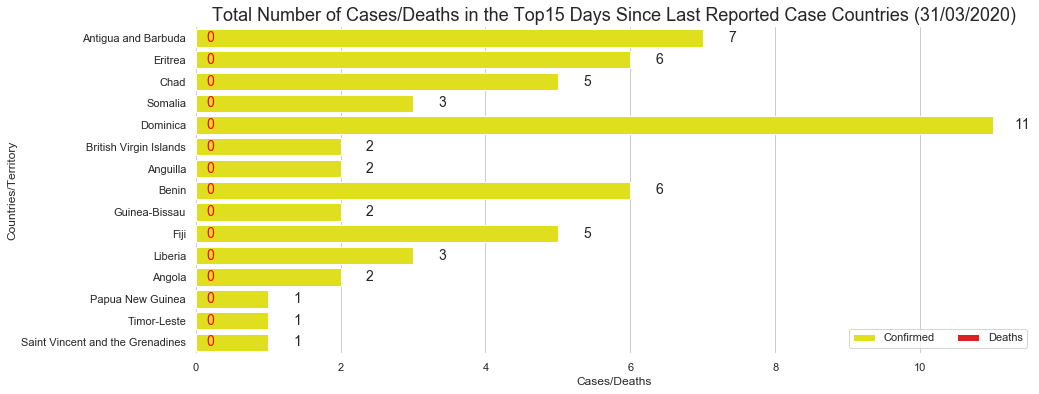

In [13]:
#seaborn defaults
confirmedDSLRC = np.array(top15DSLRC['Total Confirmed'])
deathsDSLRC = np.array(top15DSLRC['Total Deaths'])
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15DSLRC,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15DSLRC ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Days Since Last Reported Case Countries (31/03/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deathsDSLRC[i]+0.2, y=i , s=deathsDSLRC[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmedDSLRC[i]+0.4, y=i , s=confirmedDSLRC[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200331_TotalNumberCasesDeathsDSLRC.png', bbox_inches='tight')

In [14]:
Transmission_type = pd.get_dummies(df, columns=['Transmission Classification'])
Transmission_type

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Days since last reported case,Death Rate,Transmission Classification_Imported cases only,Transmission Classification_Local transmission,Transmission Classification_Under investigation
195,Gambia,3,0,1,0,2,33.333333,1,0,0
107,Sudan,6,0,2,0,1,33.333333,1,0,0
141,Nicaragua,4,0,1,0,2,25.000000,1,0,0
194,Zimbabwe,5,0,1,0,3,20.000000,0,1,0
191,Cabo Verde,5,0,1,0,3,20.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
134,Bahamas,14,4,0,0,0,0.000000,0,1,0
133,Haiti,15,0,0,0,1,0.000000,1,0,0
132,El Salvador,30,6,0,0,0,0.000000,0,1,0
131,Barbados,33,7,0,0,0,0.000000,0,1,0


In [15]:
print('The number of countries with only imported cases is:',Transmission_type['Transmission Classification_Imported cases only'].sum())

The number of countries with only imported cases is: 36


In [16]:
print('The number of countries with local transmissions cases is:',Transmission_type['Transmission Classification_Local transmission'].sum())

The number of countries with local transmissions cases is: 157


In [17]:
print('The number of countries under investigation to determine the type of transmission is:',Transmission_type['Transmission Classification_Under investigation'].sum())

The number of countries under investigation to determine the type of transmission is: 8
